In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
from prophet import Prophet

In [9]:
transactions =  pd.read_parquet(r"..\all_data\main_data_parq\transaction_df.parquet")

linker = transactions['place'].notnull()
start_len_data = len(transactions)
transactions = transactions[linker]
print("Число удаленных строк с None в place: ", start_len_data - len(transactions))

transactions.info() 

Число удаленных строк с None в place:  432
<class 'pandas.core.frame.DataFrame'>
Index: 874604 entries, 0 to 875035
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   product   874604 non-null  object        
 1   price     874604 non-null  float64       
 2   amount    874604 non-null  float64       
 3   place     874604 non-null  object        
 4   datetime  874604 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 40.0+ MB


In [19]:
linker = ((transactions["price"] > 0) & (transactions["amount"] > 0))
start_len_data = len(transactions)
transactions = transactions[linker]
print("Число удаленных строк с отрицательными значениями price, amount: ", start_len_data - len(transactions))

transactions.describe() 


Число удаленных строк с отрицательными значениями price, amount:  0


,product,price,amount,place,datetime
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02 05:33:00
6,Целебные травы,3.90,1.736619,Анор Лондо,2216-01-02 11:54:00
...,...,...,...,...,...
875031,Эстус,9.28,1.079104,Фалькония,2218-09-27 14:50:00
875032,Эстус,9.28,1.580617,Фалькония,2218-09-27 06:16:00
875033,Эстус,9.28,1.738492,Фалькония,2218-09-27 11:14:00
875034,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00


In [24]:
transactions

,product,price,amount,place,datetime
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02 05:33:00
6,Целебные травы,3.90,1.736619,Анор Лондо,2216-01-02 11:54:00
...,...,...,...,...,...
875031,Эстус,9.28,1.079104,Фалькония,2218-09-27 14:50:00
875032,Эстус,9.28,1.580617,Фалькония,2218-09-27 06:16:00
875033,Эстус,9.28,1.738492,Фалькония,2218-09-27 11:14:00
875034,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00


In [27]:
itoger = []
for (place, producter), place_product_df  in transactions.groupby(['place', 'product']):
    for (datetimes), data in place_product_df.groupby(place_product_df['datetime'].dt.date):
        dater = {'date':[datetimes],
                'price':[data.price.iloc[-1]],
                 'product':[data['product'].iloc[-1]],
                'place':[data.place.iloc[-1]],
                'amount':[data.amount.sum()]}
        new_one = pd.DataFrame(data = dater)
        itoger.append(new_one)
transactions= pd.concat(itoger)

In [28]:
transactions

,date,price,product,place,amount
0,2216-01-02,3.90,Целебные травы,Анор Лондо,37.802874
0,2216-01-03,3.90,Целебные травы,Анор Лондо,43.264844
0,2216-01-04,3.90,Целебные травы,Анор Лондо,35.629889
0,2216-01-05,3.90,Целебные травы,Анор Лондо,37.474104
0,2216-01-06,3.90,Целебные травы,Анор Лондо,48.586827
...,...,...,...,...,...
0,2218-09-23,9.28,Эстус,Фалькония,58.409777
0,2218-09-24,9.28,Эстус,Фалькония,48.620474
0,2218-09-25,9.28,Эстус,Фалькония,59.634726
0,2218-09-26,9.28,Эстус,Фалькония,52.100924


09:11:21 - cmdstanpy - INFO - Chain [1] start processing
09:11:22 - cmdstanpy - INFO - Chain [1] done processing
d:\Applications\Anaconda\envs\stan\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Applications\Anaconda\envs\stan\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


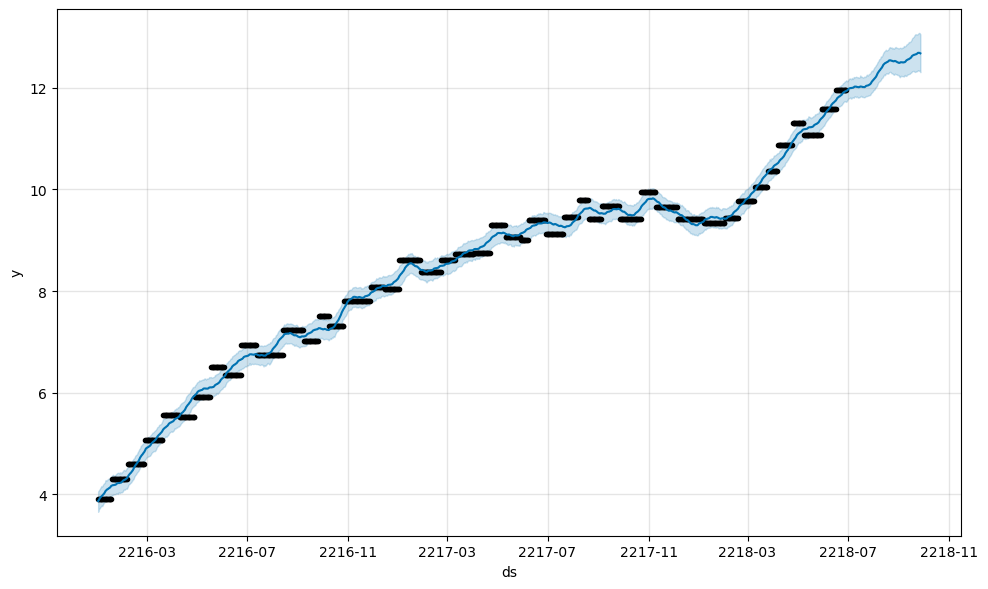

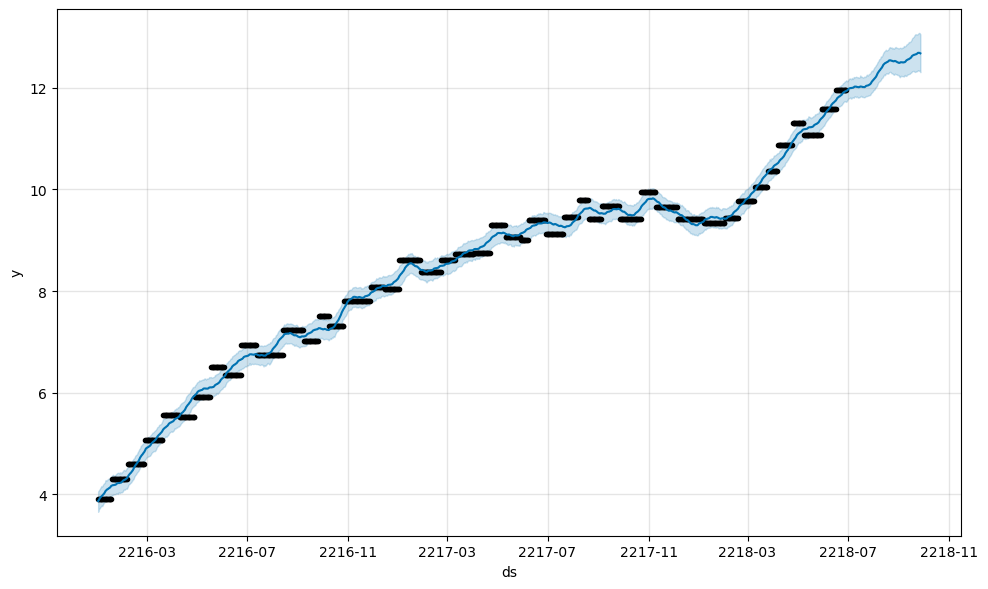

In [41]:
transactions.loc[:, ~transactions.columns.isin(['amount'])]
predictions = 90
for places in transactions.place.unique():
    for prod in transactions['product'].unique():
        linker = ((transactions["place"] == places) & (transactions["product"] == prod))
        predictions = 90
        train_df = transactions[linker][['date', 'price']][:-predictions].copy()
        train_df.reset_index()
        train_df.columns = ['ds', 'y']
        m = Prophet()
        m.fit(train_df)
        break 
    break 
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)
m.plot(forecast)

d:\Applications\Anaconda\envs\stan\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Applications\Anaconda\envs\stan\lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
d:\Applications\Anaconda\envs\stan\lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

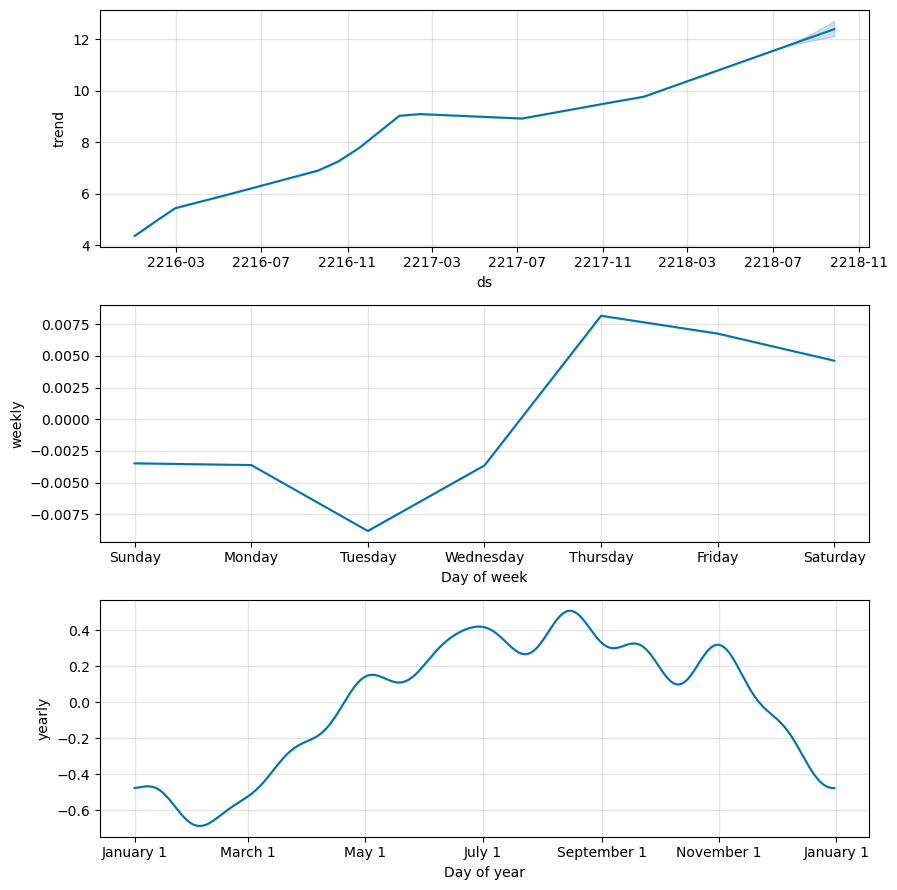

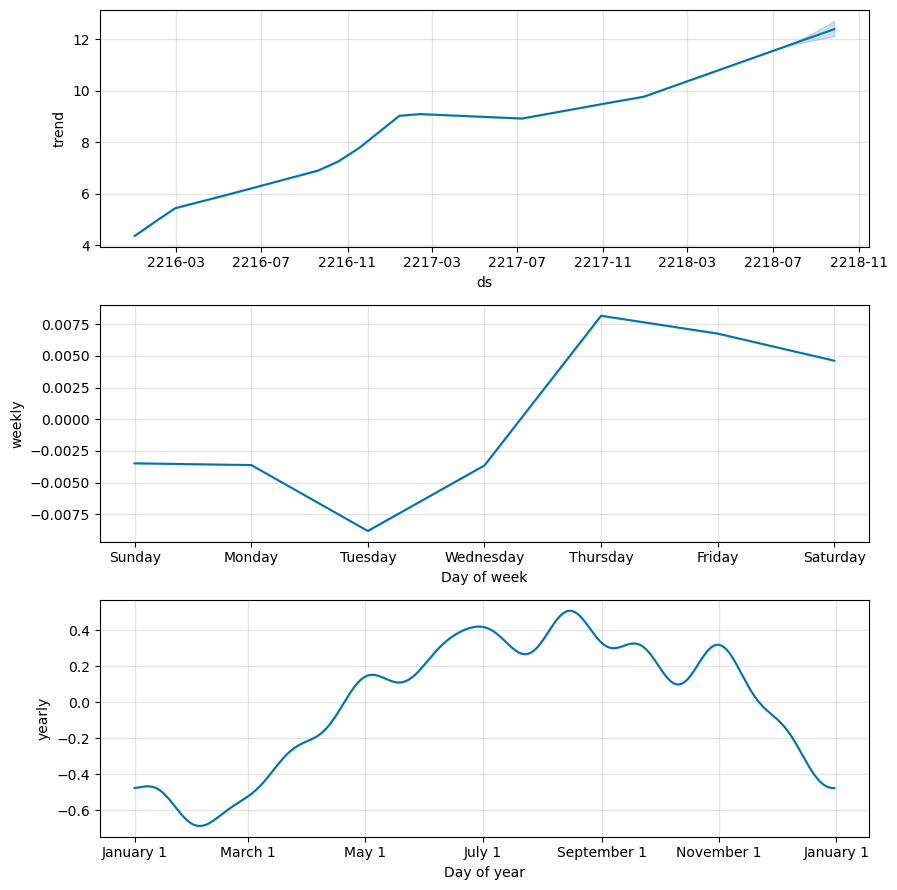

In [37]:
m.plot_components(forecast)

In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2216-01-02,4.354636,3.657872,4.057748,4.354636,4.354636,-0.486180,-0.486180,-0.486180,-0.008822,-0.008822,-0.008822,-0.477358,-0.477358,-0.477358,0.0,0.0,0.0,3.868456
1,2216-01-03,4.373655,3.708888,4.081293,4.373655,4.373655,-0.481011,-0.481011,-0.481011,-0.003645,-0.003645,-0.003645,-0.477366,-0.477366,-0.477366,0.0,0.0,0.0,3.892644
2,2216-01-04,4.392674,3.729060,4.105498,4.392674,4.392674,-0.468381,-0.468381,-0.468381,0.008173,0.008173,0.008173,-0.476554,-0.476554,-0.476554,0.0,0.0,0.0,3.924293
3,2216-01-05,4.411692,3.755410,4.136741,4.411692,4.411692,-0.468379,-0.468379,-0.468379,0.006766,0.006766,0.006766,-0.475145,-0.475145,-0.475145,0.0,0.0,0.0,3.943313
4,2216-01-06,4.430711,3.777516,4.164041,4.430711,4.430711,-0.468749,-0.468749,-0.468749,0.004625,0.004625,0.004625,-0.473373,-0.473373,-0.473373,0.0,0.0,0.0,3.961962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2218-09-23,12.353394,12.324692,13.047709,12.080735,12.679916,0.316383,0.316383,0.316383,-0.003645,-0.003645,-0.003645,0.320029,0.320029,0.320029,0.0,0.0,0.0,12.669778
996,2218-09-24,12.363051,12.342190,13.054258,12.087010,12.691678,0.322552,0.322552,0.322552,0.008173,0.008173,0.008173,0.314379,0.314379,0.314379,0.0,0.0,0.0,12.685604
997,2218-09-25,12.372708,12.335546,13.076517,12.090495,12.712295,0.313757,0.313757,0.313757,0.006766,0.006766,0.006766,0.306991,0.306991,0.306991,0.0,0.0,0.0,12.686465
998,2218-09-26,12.382365,12.330775,13.077192,12.091500,12.725481,0.302521,0.302521,0.302521,0.004625,0.004625,0.004625,0.297896,0.297896,0.297896,0.0,0.0,0.0,12.684886


array([False, False,  True, False, False])